## Basic Data Analysis On Openpose Keypoints



#### Top level directory layout required
Set this directory structure accordingly in order to utilize this python file. 

<pre>
.
|__ GaHu-VideoDataset               # Directory that store original GaHu Video Dataset
    |__ coco_output                 # coco_ouput refers to 18 keypoints output from Openpose. 
        |__ Track_A                 # Track A , B and C each contains cross view video of x01 person 
            |__ Sx_Track_1_Left     # walkiing from left to right or right to left. 
            |__ Sx_Track_1_Right
        |__ Track_B
            |__ Sx_Track_2_Left
            |__ Sx_Track_2_Right
        |__ Track_C
            |__ Sx_Track_3_Left
            |__ Sx_Track_3_Left
</pre>

In [6]:
import numpy as np
import os
import cv2
import json
import pandas as pd

In [8]:
##if running on google colab with google drive.
##not recommended as colab CPU takes more than 30 minutes for this computation. 


# from google.colab import drive
# drive.mount('/content/drive')

In [9]:
from itertools import zip_longest
def grouper(n, iterable, fillvalue=None):

    args = [iter(iterable)] * n
    return zip_longest(fillvalue=fillvalue, *args)


keypoints_label=list(range(0,18))
print(keypoints_label)

##For testing
#x=[560.831, 194.386, 0.66248, 525.507, 249.299, 0.593418, 511.892, 247.365, 0.714152, 509.853, 335.541, 0.554194, 535.341, 415.816, 0.495816, 539.215, 251.25, 0.501823, 0, 0, 0, 0, 0, 0, 509.822, 413.881, 0.407317, 533.396, 531.438, 0.197238, 552.983, 660.722, 0.118897, 535.351, 411.923, 0.306555, 558.845, 525.54, 0.135417, 558.835, 654.829, 0.0919664, 556.869, 180.823, 0.731396, 0, 0, 0, 539.247, 184.633, 0.673713, 0, 0, 0]
#[x for x in grouper(3,x)]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]


In [10]:
##Setup data folder

##if using on google drive:
#dir='/content/drive/MyDrive/ITI110_DeepLearningProject/DataSets/GaHu-VideoDataset/coco_output'

##if on local machine. Modify as per required.
dir='./GaHu-VideoDataset/coco_output'


data_folder_list = [dir+"/Track_A/Sx_Track_1_Right/Keypoints/",dir+"/Track_A/Sx_Track_1_Left/Keypoints/",
                    dir+"/Track_B/Sx_Track_2_Right/Keypoints/",dir+"/Track_B/Sx_Track_2_Left/Keypoints/",
                    dir+"/Track_C/Sx_Track_3_Right/Keypoints/",dir+"/Track_C/Sx_Track_3_Left/Keypoints/"]

   

In [11]:
keypoints_detected=[]      #list of json files with keypoints detected


no_keypoints_detected=[]   #list of json files with no keypoints detected


number_keypoints=[]        #number of keypoints detected
number_keypoints_per_track= {'TrackA':0,'TrackB':0,'TrackC':0}

keypoint_position_detected=dict.fromkeys(keypoints_label,0) #create dict of keypoints for counting number of instances for each keypoint
keypoint_position_detected_per_track= {'TrackA':dict.fromkeys(keypoints_label,0),'TrackB':dict.fromkeys(keypoints_label,0),'TrackC':dict.fromkeys(keypoints_label,0)}

for data_folder in data_folder_list:

    for root, dirs, files in os.walk(data_folder , topdown=False):
        #print(root,dirs,files,'/n')
        json_files = [pos_json for pos_json in os.listdir(root) if pos_json.endswith('.json')]
        #print(root)

        for file in json_files:


            temp_df = json.load(open(root+'/'+file))
            try:
                kp_list=temp_df['people'][0]['pose_keypoints_2d']
                keypoints_detected.append(file)
                kp_count=sum(map (lambda x:x>0, kp_list[0::3])) #sum non-zero keypoints based on confidence
                number_keypoints.append(kp_count)   
                if 'Track_A' in data_folder:
                    number_keypoints_per_track['TrackA']+=kp_count
                elif 'Track_B' in data_folder:
                    number_keypoints_per_track['TrackB']+=kp_count

                else:
                    number_keypoints_per_track['TrackC']+=kp_count

                    
                for k in enumerate([x for x in grouper(3,kp_list)]):   #grouper produce tuple of keypoint number and x,y,c. x and y are coordingates. c is confidence.
                    #print(k[0],k[1])
                    if k[1][2]>0:
                        # print(k[1][2])
                        keypoint_position_detected[k[0]]+=1
                        #print(keypoint_position_detected)
                        
                        if 'Track_A' in data_folder:
                            keypoint_position_detected_per_track['TrackA'][k[0]]+=1  #add respective detected keypoint count to the keypoint label. 
                        elif 'Track_B' in data_folder:
                            keypoint_position_detected_per_track['TrackB'][k[0]]+=1
                        else:
                            keypoint_position_detected_per_track['TrackC'][k[0]]+=1
                        
                    else:
                        continue



            except:
                #print(file, 'no pose_keypoints_2d')
                no_keypoints_detected.append(file)
# print('keypoints_detected',keypoints_detected, len(keypoints_detected))
# print('no_keypoints_detected',no_keypoints_detected, len(no_keypoints_detected))

print('keypoints_detected',len(keypoints_detected))
print('no_keypoints_detected', len(no_keypoints_detected))




#print('number_keypoints',number_keypoints, len(number_keypoints))
print('keypoint_position_detected',keypoint_position_detected)
print('number_keypoints_per_track',number_keypoints_per_track)
print('keypoint_position_detected_per_track',keypoint_position_detected_per_track)

keypoints_detected 13230
no_keypoints_detected 12881
keypoint_position_detected {0: 11763, 1: 13109, 2: 12967, 3: 6346, 4: 5147, 5: 12909, 6: 6843, 7: 5482, 8: 12845, 9: 11285, 10: 7788, 11: 12868, 12: 11263, 13: 7551, 14: 8468, 15: 8568, 16: 6586, 17: 7217}
number_keypoints_per_track {'TrackA': 54010, 'TrackB': 57010, 'TrackC': 57985}
keypoint_position_detected_per_track {'TrackA': {0: 3745, 1: 4218, 2: 4164, 3: 1986, 4: 1623, 5: 4146, 6: 2224, 7: 1798, 8: 4131, 9: 3599, 10: 2419, 11: 4142, 12: 3607, 13: 2403, 14: 2651, 15: 2699, 16: 2081, 17: 2374}, 'TrackB': {0: 3966, 1: 4410, 2: 4367, 3: 2183, 4: 1740, 5: 4335, 6: 2286, 7: 1823, 8: 4324, 9: 3803, 10: 2662, 11: 4327, 12: 3778, 13: 2535, 14: 2885, 15: 2944, 16: 2223, 17: 2419}, 'TrackC': {0: 4052, 1: 4481, 2: 4436, 3: 2177, 4: 1784, 5: 4428, 6: 2333, 7: 1861, 8: 4390, 9: 3883, 10: 2707, 11: 4399, 12: 3878, 13: 2613, 14: 2932, 15: 2925, 16: 2282, 17: 2424}}


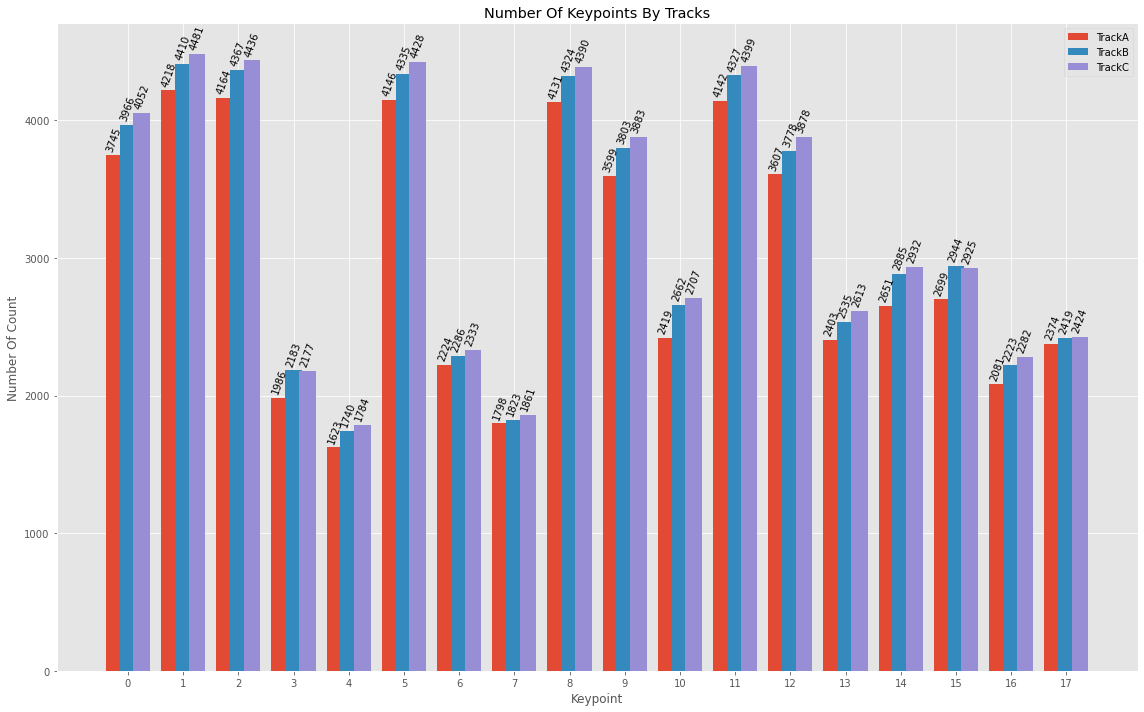

In [12]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
x=np.arange(len(keypoint_position_detected_per_track['TrackA'].values()))
width=0.3
fig,ax=plt.subplots(figsize=(16,10))
#fig.set_size_inches(21, 10.5, forward=True)


trackA=ax.bar(x-(width/2+width/3), keypoint_position_detected_per_track['TrackA'].values(), width, label='TrackA')
trackB=ax.bar(x, keypoint_position_detected_per_track['TrackB'].values(), width, label='TrackB')
trackC=ax.bar(x+(width/2+width/3), keypoint_position_detected_per_track['TrackC'].values(), width, label='TrackC')


ax.set_ylabel('Number Of Count')
ax.set_xlabel('Keypoint')
ax.set_title('Number Of Keypoints By Tracks')
ax.set_xticks(x)
ax.set_xticklabels(x)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points", rotation=70,
                    ha='center', va='bottom')


autolabel(trackA)
autolabel(trackB)
autolabel(trackC)





fig.tight_layout()
plt.show()

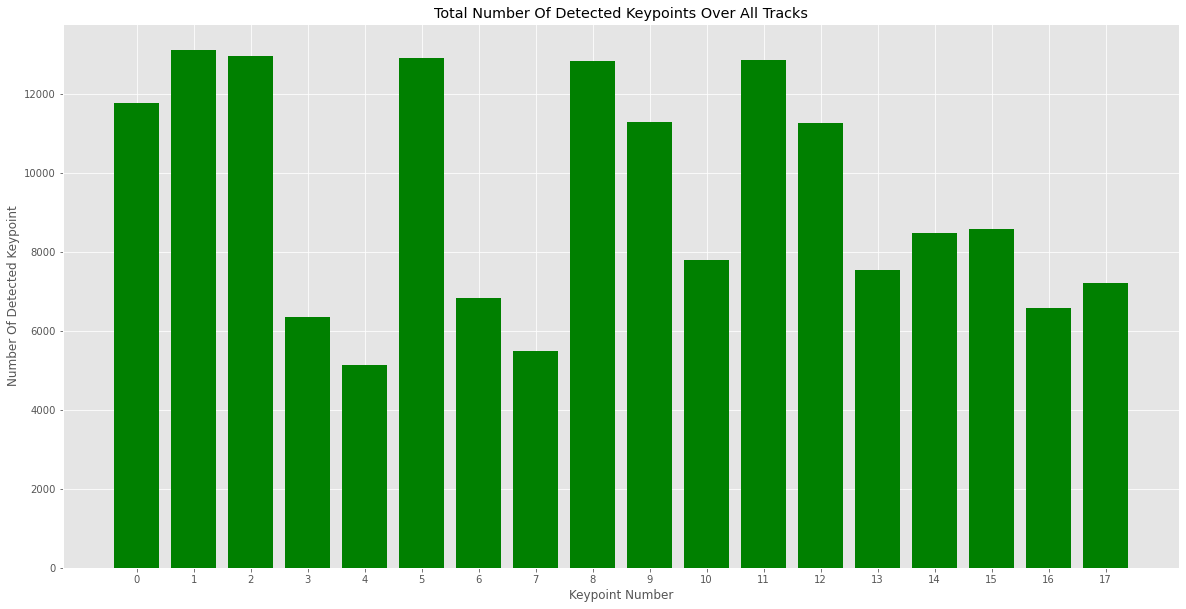

In [13]:
plt.style.use('ggplot')

x = list(keypoint_position_detected.keys())
y = list(keypoint_position_detected.values())


#x_pos = [i for i, _ in enumerate(x)]
plt.figure(figsize=(20,10))
plt.bar(x, y, color='green')
plt.xlabel("Keypoint Number")
plt.ylabel("Number Of Detected Keypoint")
plt.title("Total Number Of Detected Keypoints Over All Tracks")

plt.xticks(x)

plt.show()

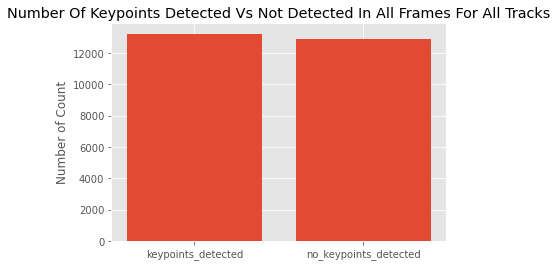

In [14]:
data={'keypoints_detected':len(keypoints_detected),'no_keypoints_detected':len(no_keypoints_detected)}

plt.ylabel("Number of Count")
plt.title("Number Of Keypoints Detected Vs Not Detected In All Frames For All Tracks")


plt.bar(data.keys(), data.values())
plt.show()